In this case, the tutorial assumes that quality is a continuous variable: the task is then not a binary classification task but an ordinal regression task. It’s a type of regression that is used for predicting an ordinal variable: the quality value exists on an arbitrary scale where the relative ordering between the different quality values is significant. In this scale, the quality scale 0-10 for “very bad” to “very good” is such an example.

Note that you could also view this type of problem as a classification problem and consider the quality labels as fixed class labels.

In any case, this situation setup would mean that your target labels are going to be the quality column in your red and white DataFrames for the second part of this tutorial. This will require some additional preprocessing.Now, tt’s time to get your data!

Loading In The Data
This can be easily done with the Python data manipulation library Pandas. You follow the import convention and import the package under it’s alias, pd.

Next, you make use of the read_csv() function to read in the CSV files in which the data is stored. Additionally, use the sep argument to specify that the separator in this case is a semicolon and not a regular comma.

In [1]:
# Import pandas 
import pandas as pd

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

#### Data Exploration
With the data at hand, it’s easy for you to learn more about these wines! One of the first things that you’ll probably want to do is to start off with getting a quick view on both of your DataFrames:

In [2]:
# Print info on white wine
print(white.info())

# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null fl

Now is the time to check whether your import was successful: double check whether the data contains all the variables that the data description file of the UCI Machine Learning Repository promised you. Besides the number of variables, also check the quality of the import: are the data types correct? Did all the rows come through? Are there any null values that you should take into account when you’re cleaning up the data?

You might also want to check out your data with more than just info()

In [3]:
# First rows of `red` 
red.head()

# Last rows of `white`
white.tail()

# Take a sample of 5 rows of `red`
red.sample(5)

# Describe `white`
white.describe()

# Double check for null values in `red`
pd.isnull(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


A brief recap of all these pandas functions: you see that head(), tail() and sample() are awesome because they provide you with a quick way of inspecting your data without any hassle.

Next, describe() offers some summary statistics about your data that can help you to assess your data quality. You see that some of the variables really have a lot of difference in their min and max values. This is something that you’ll deal with later, but at this point, it’s just very important to be aware of this.

Lastly, you have double checked the presence of null values in red with the help of isnull(). This is a function that always can come in handy when you’re still in doubt after having read the results of info().

Tip: also check out whether the wine data contains null values. You can do this by using the IPython shell of the DataCamp Light chunk which you see right above.

Now that you have already inspected your data to see if the import was successful and correct, it’s time to dig a little bit deeper.

#### Visualizing The Data
One way to do this is by looking at the distribution of some of the dataset’s variables and make scatter plots to see possible correlations. Of course, you can take this all to a much higher level if you would use this data for your own project.

Alcohol

One variable that you could find interesting at first sight is alcohol. It’s probably one of the first things that catches your attention when you’re inspecting a wine data set. You can visualize the distributions with any data visualization library, but in this case, the tutorial makes use of matplotlib to quickly plot the distributions:

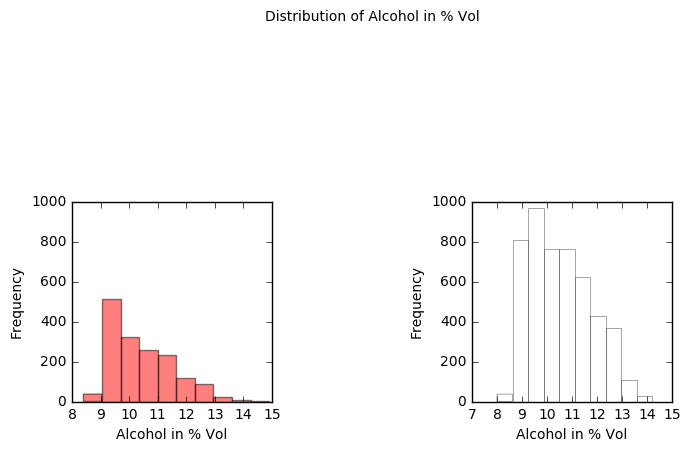

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

As you can see in the image below, you see that the alcohol levels between the red and white wine are mostly the same: they have around 9% of alcohol. Of course, there are also a considerable amount of observations that have 10% or 11% of alcohol percentage.

Note that you can double check this if you use the histogram() function from the numpy package to compute the histogram of the white and red data, just like this

In [5]:
import numpy as np
print(np.histogram(red.alcohol, bins=[7,8,9,10,11,12,13,14,15]))
print(np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

(array([  0,   7, 673, 452, 305, 133,  21,   8], dtype=int64), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))
(array([   0,  317, 1606, 1256,  906,  675,  131,    7], dtype=int64), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


https://www.datacamp.com/community/tutorials/matplotlib-3d-volumetric-data#gs.LbkVnuk

###### Sulphates
Next, one thing that interests me is the relation between the sulphates and the quality of the wine. As you have read above, sulphates can cause people to have headaches and I’m wondering if this infuences the quality of the wine. What’s more, I often hear that women especially don’t want to drink wine exactly because it causes headaches. Maybe this affects the ratings for the red wine?

Let’s take a look.

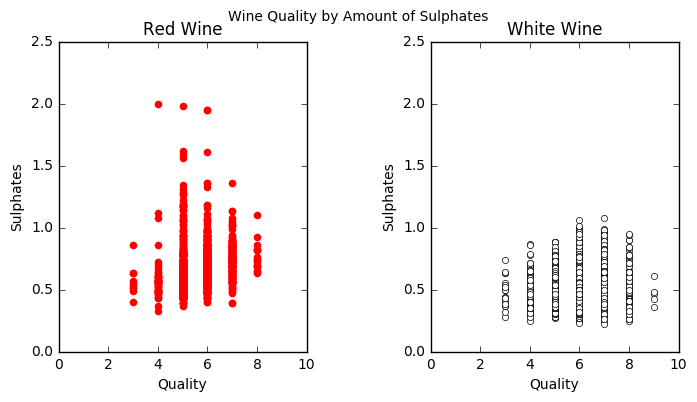

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

As you can see in the image below, the red wine seems to contain more sulphates than the white wine, which has less sulphates above 1 g/dm3dm3. For the white wine, there only seem to be a couple of exceptions that fall just above 1 g/dm3dm3, while this is definitely more for the red wines. This could maybe explain the general saying that red wine causes headaches, but what about the quality?

You can clearly see that there is white wine with a relatively low amount of sulphates that gets a score of 9, but for the rest it’s difficult to interpret the data correctly at this point.

Of course, you need to take into account that the difference in observations could also affect the graphs and how you might interpret them.

###### Acidity
Apart from the sulphates, the acidity is one of the major and important wine characteristics that is necessary to achieve quality wines. Great wines often balance out acidity, tannin, alcohol and sweetness. Some more research taught me that in quantities of 0.2 to 0.4 g/L, volatile acidity doesn’t affect a wine’s quality. At higher levels, however, volatile acidity can give wine a sharp, vinegary tactile sensation. Extreme volatile acidity signifies a seriously flawed wine.

Let’s put the data to the test and make a scatter plot that plots the alcohol versus the volatile acidity. The data points should be colored according to their rating or quality label:

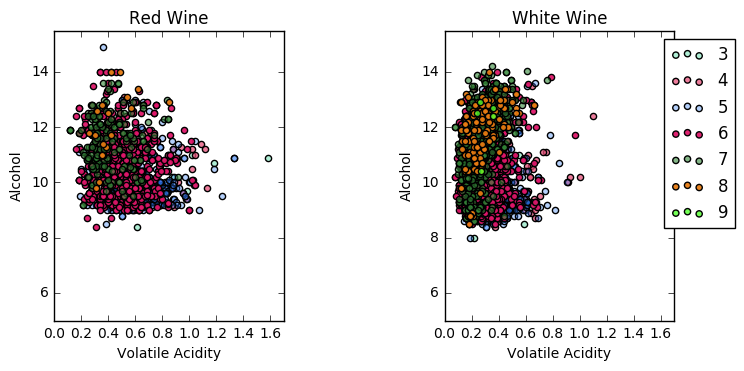

In [7]:
np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

Note that the colors in this image are randomly chosen with the help of the NumPy random module. You can always change this by passing a list to the redcolors or whitecolors variables. Make sure that they are the same (except for 1 because the white wine data has one unique quality value more than the red wine data), though, otherwise your legends are not going to match!

In the image above, you see that the levels that you have read about above especially hold for the white wine: most wines with label 8 have volatile acidity levels of 0.5 or below, but whether or not it has an effect on the quality is too difficult to say, since all the data points are very densely packed towards one side of the graph.

This maybe was a lot to digest, so it’s never too late for a small recap of what you have seen during your EDA that could be important for the further course of this tutorial:

Some of the variables of your data sets have values that are considerably far apart. You can and will deal with this in the next section of the tutorial.
You have an ideal scenario: there are no null values in the data sets.
Most wines that were included in the data set have around 9% of alcohol.
Red wine seems to contain more sulphates than the white wine, which has less sulphates above 1 g/dm3dm3.
You saw that most wines had a volatile acidity of 0.5 and below. At the moment, there is no direct relation to the quality of the wine.
Up until now, you have looked at the white wine and red wine data separately. The two seem to differ somewhat when you look at some of the variables from close up, and in other cases, the two seem to be very similar. Do you think that there could there be a way to classify entries based on their variables into white or red wine?

There is only one way to find out: preprocess the data and model it in such a way so that you can see what happens!

#### Preprocess Data
Now that you have explored your data, it’s time to act upon the insights that you have gained! Let’s preprocess the data so that you can start building your own neural network!

In [8]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

You set ignore_index to True in this case because you don’t want to keep the index labels of white when you’re appending the data to red: you want the labels to continue from where they left off in red, not duplicate index labels from joining both data sets together.

Intermezzo: Correlation Matrix
Now that you have the full data set, it’s a good idea to also do a quick data exploration; You already know some stuff from looking at the two data sets separately, and now it’s time to gather some more solid insights, perhaps.

Since it can be somewhat difficult to interpret graphs, it’s also a good idea to plot a correlation matrix. This will give insights more quickly about which variables correlate:

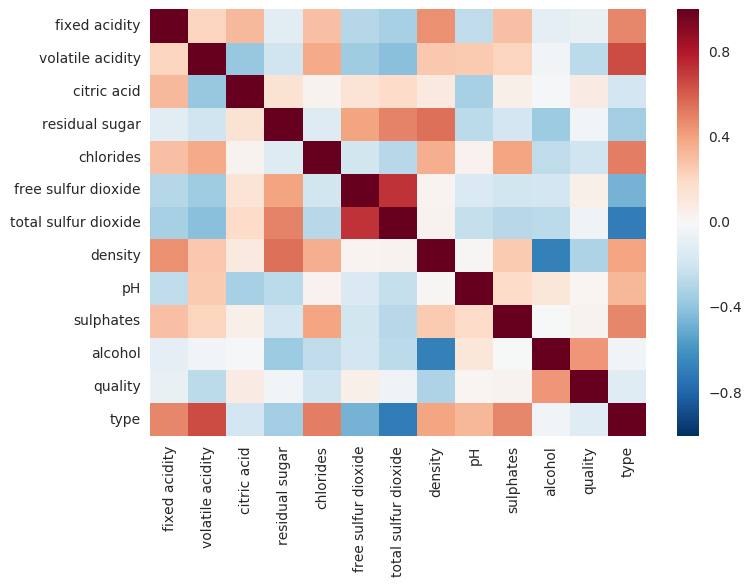

In [9]:
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.show()

As you would expect, there are some variables that correlate, such as density and residual sugar. Also volatile acidity and type are more closely connected than you originally could have guessed by looking at the two data sets separately, and it was kind of to be expected that free sulfur dioxide and total sulfur dioxide were going to correlate.


Since the quality variable becomes your target class, you will now need to isolate the quality labels from the rest of the data set. You will put wines.quality in a different variable y and you’ll put the wines data, with exception of the quality column in a variable x.

Next, you’re ready to split the data in train and test sets, but you won’t follow this approach in this case (even though you could!). In this second part of the tutorial, you will make use of k-fold validation, which requires you to split up the data into K partitions. Usually, K is set at 4 or 5. Next, you instantiate identical models and train each one on a partition, while also evaluating on the remaining partitions. The validation score for the model is then an average of the K validation scores obtained.

You’ll see how to do this later. For now, use StandardScaler to make sure that your data is in a good place before you fit the data to the model, just like before.



In [10]:
# Isolate target labels
y = wines.quality

# Isolate data
X = wines.drop('quality', axis=1) 

Remember that you also need to perform the scaling again because you had a lot of differences in some of the values for your red, white (and consequently also wines) data.

In [11]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

Now that you’re data is preprocessed, you can move on to the real work: building your own neural network to classify wines.

#### Model Data
Now you’re again at the point where you were a bit ago. You can again start modelling the neural network!

Model Neural Network Architecture
Now that you have preprocessed the data again, it’s once more time to construct a neural network model, a multi-layer perceptron. Even though you’ll use it for a regression task, the architecture could look very much the same, with two Dense layers.

Don’t forget that the first layer is your input layer. You will need to pass the shape of your input data to it. In this case, you see that you’re going to make use of input_dim to pass the dimensions of the input data to the Dense layer.

In [12]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the model
model = Sequential()

# Add input layer 
model.add(Dense(64, input_dim=12, activation='relu'))
    
# Add output layer 
model.add(Dense(1))

Using Theano backend.


Note again that the first layer that you define is the input layer. This layer needs to know the input dimensions of your data. You pass in the input dimensions, which are 12 in this case (don’t forget that you’re also counting the Type column which you have generated in the first part of the tutorial!). You again use the relu activation function, but once again there is no bias involved. The number of hidden units is 64.

Your network ends with a single unit Dense(1), and doesn’t include an activation. This is a typical setup for scalar regression, where you are trying to predict a single continuous value).

In [13]:
# Model output shape
print("Model shape")
model.output_shape

# Model summary
print("Model summary")
model.summary()

# Model config
print("Model config")
model.get_config()

# List all weight tensors 
print("Model weights")
model.get_weights()

Model shape
Model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                832       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________
Model config
Model weights


[array([[ -1.27416834e-01,  -2.36661717e-01,   1.45762309e-01,
          -3.76416035e-02,  -7.68067911e-02,  -1.75986677e-01,
           8.52433592e-02,  -1.79509297e-01,  -1.76260948e-01,
           9.37141553e-02,  -4.43644039e-02,   1.45293921e-01,
          -1.01652488e-01,  -1.62125885e-01,   2.44609267e-01,
          -2.00397432e-01,  -3.72927040e-02,  -1.74041435e-01,
          -1.85009122e-01,   1.01437412e-01,   1.46075115e-01,
          -1.92468017e-01,  -2.69632280e-01,  -4.56598513e-02,
           9.01082903e-02,  -1.84258357e-01,   1.32669717e-01,
          -9.16304886e-02,  -2.13383824e-01,  -1.96669698e-01,
           1.65650517e-01,  -1.45309880e-01,   2.74527073e-01,
           1.83689937e-01,   2.62443632e-01,  -1.88104101e-02,
          -8.21683928e-03,   1.38422236e-01,  -1.29593864e-01,
           2.58354604e-01,   2.61477947e-01,  -1.24832876e-01,
          -9.19916481e-02,  -2.66074575e-02,   2.88327597e-03,
           2.98250467e-02,  -1.48181438e-01,  -1.911127

#### Compile The Model, Fit The Data
With your model at hand, you can again compile it and fit the data to it. But wait. Don’t you need the K fold validation partitions that you read about before? That’s right.

In [22]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X[train], y[train], epochs=10, verbose=1)

Epoch 1/10
5195/5195 [==============================] - 0s - loss: 13.7241 - mean_absolute_error: 3.2489     
Epoch 2/10
5195/5195 [==============================] - 0s - loss: 1.5731 - mean_absolute_error: 0.9830     
Epoch 3/10
5195/5195 [==============================] - 0s - loss: 0.9524 - mean_absolute_error: 0.7635     
Epoch 4/10
5195/5195 [==============================] - 0s - loss: 0.7092 - mean_absolute_error: 0.6560     
Epoch 5/10
5195/5195 [==============================] - 0s - loss: 0.6032 - mean_absolute_error: 0.6055     
Epoch 6/10
5195/5195 [==============================] - 0s - loss: 0.5508 - mean_absolute_error: 0.5790     
Epoch 7/10
5195/5195 [==============================] - 0s - loss: 0.5225 - mean_absolute_error: 0.5651     
Epoch 8/10
5195/5195 [==============================] - 0s - loss: 0.5067 - mean_absolute_error: 0.5555     
Epoch 9/10
5195/5195 [==============================] - 0s - loss: 0.4977 - mean_absolute_error: 0.5521     
Epoch 10/10
5195/5

Use the compile() function to compile the model and then use fit() to fit the model to the data. To compile the model, you again make sure that you define at least the optimizer and loss arguments. In this case, you can use rsmprop, one of the most popular optimization algorithms, and mse as the loss function, which is very typical for regression problems such as yours.

The additional metrics argument that you define is actually a function that is used to judge the performance of your model. For regression problems, it’s very common to take the Mean Absolute Error (MAE) as a metric. You’ll read more about this in the next section.

Pass in the train data and labels to fit(), determine how many epochs you want to run the fitting, the batch size and if you want, you can put the verbose argument to 1 to get more logs because this can take up some time.

#### Predict Values
Let’s put your model to use! You can make predictions for the labels of the test set with it. Just use predict() and pass the test set to it to predict the labels for the data. In this case, the result is stored in y_pred:

In [15]:
y_pred = model.predict(X[test])

Just like before, you should also evaluate your model. Besides adding y_pred = model.predict(X[test]) to the rest of the code above, it might also be a good idea to use some of the evaluation metrics from sklearn, like you also have done in the first part of the tutorial.

To do this, you can make use of the Mean Squared Error (MSE) and the Mean Absolute Error (MAE). The former, which is also called the “mean squared deviation” (MSD) measures the average of the squares of the errors or deviations. In other words, it quantifies the difference between the estimator and what is estimated. This way, you get to know some more about the quality of your estimator: it is always non-negative, and values closer to zero are better.

The latter evaluation measure, MAE, stands for Mean Absolute Error: it quantifies how close predictions are to the eventual outcomes.

Add these lines to the previous code chunk, and be careful with the indentations:

In [16]:
mse_value, mae_value = model.evaluate(X[test], y[test], verbose=0)
print(mse_value)
print(mae_value)

0.521788780057
0.560141271872


Note that besides the MSE and MAE scores, you could also use the R2 score or the regression score function. Here, you should go for a score of 1.0, which is the best. However, the score can also be negative!

In [17]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import r2_score

r2_score(y[test], y_pred)

0.31341710388271338

At first sight, these are quite horrible numbers, right? The good thing about this, though, is that you can now experiment with optimizing the code so that the results become a little bit better.

That’s what the next and last section is all about!

#### Model Fine-Tuning
Fine-tuning your model is probably something that you’ll be doing a lot, because not all problems are as straightforward as the one that you saw in the first part of this tutorial. As you read above, there are already two key decisions that you’ll probably want to adjust: how many layers you’re going to use and how many “hidden units” you will chose for each layer.

In the beginning, this will really be quite a journey.

Adding Layers
What would happen if you add another layer to your model? What if it would look like this?

In [18]:
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

#### Hidden Units
Also try out the effect of adding more hidden units to your model’s architecture and study the effect on the evaluation, just like this:

In [19]:
model = Sequential()
model.add(Dense(128, input_dim=12, activation='relu'))
model.add(Dense(1))

Note again that, in general, because you don’t have a ton of data, the worse overfitting can and will be. That’s why you should use a small network.

Some More Experiments: Optimization Parameters
Besides adding layers and playing around with the hidden units, you can also try to adjust (some of) the parameters of the optimization algorithm that you give to the compile() function. Up until now, you have always passed a string, such as rmsprop, to the optimizer argument.

But that doesn’t always need to be like this!

Try, for example, importing RMSprop from keras.models and adjust the learning rate lr. You can also adjust the default values that have been set for the other parameters for RMSprop() but this is not recommended. You can get more information here.

https://keras.io/optimizers/

In [20]:
from keras.optimizers import RMSprop
rmsprop = RMSprop(lr=0.0001)
model.compile(optimizer=rmsprop, loss='mse', metrics=['mae'])

Also, try out experimenting with other optimization algorithms, like the Stochastic Gradient Descent (SGD). Do you notice an effect?

In [21]:
from keras.optimizers import SGD, RMSprop
sgd=SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['mae'])

This tutorial was just a start in your deep learning journey with Python and Keras. There is still a lot to cover, so why not take DataCamp’s Deep Learning in Python course? In the meantime, also make sure to check out the Keras documentation, if you haven’t done so already. You’ll find more examples and information on all functions, arguments, more layers, etc… It’ll undoubtedly be an indispensable resource when you’re learning how to work with neural networks in Python! If you rather feel like reading a book that explains the fundamentals of deep learning (with Keras) together with how it's used in practice, you should definitely read François Chollet's Deep Learning in Python book.